<a href="https://colab.research.google.com/github/tausif-uts/Cifar10_SimpleFlaskApp/blob/master/ais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading dataset from Kaggle

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd /content/gdrive/My Drive/Colab Notebooks/ais

/content/gdrive/My Drive/Colab Notebooks/ais


In [3]:
cd AIStudio/Project

/content/gdrive/.shortcut-targets-by-id/1jW4EzHkr4lceS5UQPd_-XkRc1Vp_JoFp/AIStudio/Project


In [9]:
ls

'New Plant Diseases Dataset(Augmented)'/   test/       test2.JPG    test4.JPG
 Plant_Disease_Subset/                     test1.jpg   test3.jpeg


In [4]:
cd Plant_Disease_Dataset/

/content/gdrive/.shortcut-targets-by-id/1jW4EzHkr4lceS5UQPd_-XkRc1Vp_JoFp/AIStudio/Project/Plant_Disease_Dataset


In [ ]:
! chmod 600 kaggle.json

In [ ]:
! kaggle datasets download vipoooool/new-plant-diseases-dataset

In [ ]:
import zipfile
import os

# Define file path
zip_path = "/content/gdrive/My Drive/AIStudio/Project/new-plant-diseases-dataset.zip"
extract_path = "/content/gdrive/My Drive/AIStudio/Project/Plant_Disease_Dataset"

# Create extraction folder if not exists
os.makedirs(extract_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
cd /content/gdrive/My Drive/AIStudio/Project/Plant_Disease_Dataset

/content/gdrive/My Drive/AIStudio/Project/Plant_Disease_Dataset


# Dataset Exploring

In [12]:
import os

In [7]:
ls

'New Plant Diseases Dataset(Augmented)'/   Plant_Disease_Subset/   test/


In [ ]:
dataset_path = "New Plant Diseases Dataset(Augmented)"
train_dir = dataset_path + "/train"
val_dir = dataset_path + "/valid"

# List subfolders (classes) in training dataset
print("Classes in Training Dataset:")
print(os.listdir(train_dir))

# Count total images in train & validation sets
train_images = sum([len(files) for _, _, files in os.walk(train_dir)])
val_images = sum([len(files) for _, _, files in os.walk(val_dir)])

print(f"\nTotal Training Images: {train_images}")
print(f"Total Validation Images: {val_images}")

Classes in Training Dataset:
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spid

# Loading Dataset

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Set batch size and image size
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

# Load Training Dataset
train_dataset = keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training"
)

# Load Validation Dataset
val_dataset = keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=True,
    validation_split=0.2,
    subset="validation",
    seed=123
)

Found 70295 files belonging to 38 classes.
Using 56236 files for training.
Found 70295 files belonging to 38 classes.
Using 14059 files for validation.


In [ ]:
class_names = train_dataset.class_names
num_classes = len(class_names)

In [ ]:
print("Class Names:", class_names)
print("Number of Classes:", num_classes)

Class Names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomat

In [ ]:
# Normalize pixel values
normalization_layer = keras.layers.Rescaling(1./255)

# Apply normalization
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))


In [ ]:
from tensorflow.keras import layers, models

# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Output neurons = Number of classes
])

# Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           4,902 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,173,862 (42.62 MB)

 Trainable params: 11,173,862 (42.62 MB)

 Non-trainable params: 0 (0.00 B)

# Creating dataset Subset

In [ ]:
import tensorflow as tf
import os
from tensorflow.keras import layers, models

# Set dataset path
dataset_path = "train"  # Update this path

# Load dataset
batch_size = 32
img_size = (224, 224)

full_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    image_size=img_size,
    batch_size=batch_size
)

# Extract class names
class_names = full_dataset.class_names
print("Available classes:", class_names)

# Select only "Apple___Black_rot"
apple_black_rot_class = "Apple___Black_rot"
if apple_black_rot_class not in class_names:
    raise ValueError(f"Class '{apple_black_rot_class}' not found in dataset!")

# Get class index
class_index = class_names.index(apple_black_rot_class)

# Filter dataset for only this class
filtered_dataset = full_dataset.filter(lambda x, y: tf.reduce_any(y == class_index))

# Take only the first 20 images
subset_dataset = filtered_dataset.take(50)


# Train for one class

In [36]:
# Define CNN Model
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (only one class)
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model on the subset
history = model.fit(subset_dataset, epochs=10)


Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 428s 7s/step - accuracy: 0.0505 - loss: -3567901.2500
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


66/66 ━━━━━━━━━━━━━━━━━━━━ 26s 178ms/step - accuracy: 0.0479 - loss: -354565504.0000
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 174ms/step - accuracy: 0.0467 - loss: -4946985472.0000
Epoch 4/10


KeyboardInterrupt: 

# Predict new image on Pre Trained Model

In [10]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2

# Load the pre-trained model
model = hub.load("https://www.kaggle.com/models/rishitdagli/plant-disease/TensorFlow2/plant-disease/1")

# Disease class mapping
diseases = {
    "0": "Apple___Apple_scab",
    "1": "Apple___Black_rot",
    "2": "Apple___Cedar_apple_rust",
    "3": "Apple___healthy",
    "4": "Blueberry___healthy",
    "5": "Cherry_(including_sour)___Powdery_mildew",
    "6": "Cherry_(including_sour)___healthy",
    "7": "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot",
    "8": "Corn_(maize)___Common_rust_",
    "9": "Corn_(maize)___Northern_Leaf_Blight",
    "10": "Corn_(maize)___healthy",
    "11": "Grape___Black_rot",
    "12": "Grape___Esca_(Black_Measles)",
    "13": "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",
    "14": "Grape___healthy",
    "15": "Orange___Haunglongbing_(Citrus_greening)",
    "16": "Peach___Bacterial_spot",
    "17": "Peach___healthy",
    "18": "Pepper_bell___Bacterial_spot",
    "19": "Pepper_bell___healthy",
    "20": "Potato___Early_blight",
    "21": "Potato___Late_blight",
    "22": "Potato___healthy",
    "23": "Raspberry___healthy",
    "24": "Soybean___healthy",
    "25": "Squash___Powdery_mildew",
    "26": "Strawberry___Leaf_scorch",
    "27": "Strawberry___healthy",
    "28": "Tomato___Bacterial_spot",
    "29": "Tomato___Early_blight",
    "30": "Tomato___Late_blight",
    "31": "Tomato___Leaf_Mold",
    "32": "Tomato___Septoria_leaf_spot",
    "33": "Tomato___Spider_mites Two-spotted_spider_mite",
    "34": "Tomato___Target_Spot",
    "35": "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "36": "Tomato___Tomato_mosaic_virus",
    "37": "Tomato___healthy"
}

# Preprocess image for model
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Error loading image: {image_path}")

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (224, 224))  # Resize to model input size
    img = img.astype("float32") / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Load and preprocess the test image
image_path = "test4.JPG"  # Replace with your test image path
img = preprocess_image(image_path)

# Run inference (classification)
predictions = model(img)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Get the disease name from the dictionary
predicted_disease = diseases[str(predicted_class_index)]

# Print the result
print(f"Predicted Class Index: {predicted_class_index}")
print(f"Predicted Disease: {predicted_disease}")


Predicted Class Index: 26
Predicted Disease: Strawberry___Leaf_scorch


# Model Evaluation

In [30]:
import cv2
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix

# Define class labels
diseases = {
    str(i): name for i, name in enumerate([
        "Apple___Apple_scab", "Apple___Black_rot", "Apple___Cedar_apple_rust", "Apple___healthy",
        "Blueberry___healthy", "Cherry_(including_sour)___Powdery_mildew", "Cherry_(including_sour)___healthy",
        "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot", "Corn_(maize)___Common_rust_", "Corn_(maize)___Northern_Leaf_Blight",
        "Corn_(maize)___healthy", "Grape___Black_rot", "Grape___Esca_(Black_Measles)", "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",
        "Grape___healthy", "Orange___Haunglongbing_(Citrus_greening)", "Peach___Bacterial_spot", "Peach___healthy",
        "Pepper_bell___Bacterial_spot", "Pepper_bell___healthy", "Potato___Early_blight", "Potato___Late_blight", "Potato___healthy",
        "Raspberry___healthy", "Soybean___healthy", "Squash___Powdery_mildew", "Strawberry___Leaf_scorch", "Strawberry___healthy",
        "Tomato___Bacterial_spot", "Tomato___Early_blight", "Tomato___Late_blight", "Tomato___Leaf_Mold", "Tomato___Septoria_leaf_spot",
        "Tomato___Spider_mites Two-spotted_spider_mite", "Tomato___Target_Spot", "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
        "Tomato___Tomato_mosaic_virus", "Tomato___healthy"
    ])
}
disease_labels = {v: int(k) for k, v in diseases.items()}  # Convert class names to integers

# Ensure mapping is correct
print("Disease labels:", disease_labels)

# Preprocessing function
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"⚠️ Warning: Could not load {image_path}")
        return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img = img.astype("float32") / 255.0
    img = np.expand_dims(img, axis=0)
    return img

# Load test images
test_dir = "Plant_Disease_Subset/valid"
y_true, y_pred = [], []

for class_name in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_name)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = preprocess_image(img_path)
            if img is None:
                continue

            # Predict (Ensure model is correctly loaded)
            predictions = model(img)  # Model must be defined
            predicted_class_index = np.argmax(predictions)

            y_true.append(disease_labels.get(class_name, -1))  # Use -1 if class not found
            y_pred.append(predicted_class_index)

# Debugging - Print unique labels
print("Unique values in y_true:", set(y_true))
print("Unique values in y_pred:", set(y_pred))
print("Total unique classes:", len(set(y_true) | set(y_pred)))
print("Total target names:", len(disease_labels))

# Ensure predictions are in valid range
y_pred = [min(p, len(disease_labels) - 1) for p in y_pred]

# Compute evaluation metrics
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, labels=list(range(len(disease_labels))), target_names=list(disease_labels.keys())))

print("\n📉 Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))



Disease labels: {'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper_bell___Bacterial_spot': 18, 'Pepper_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


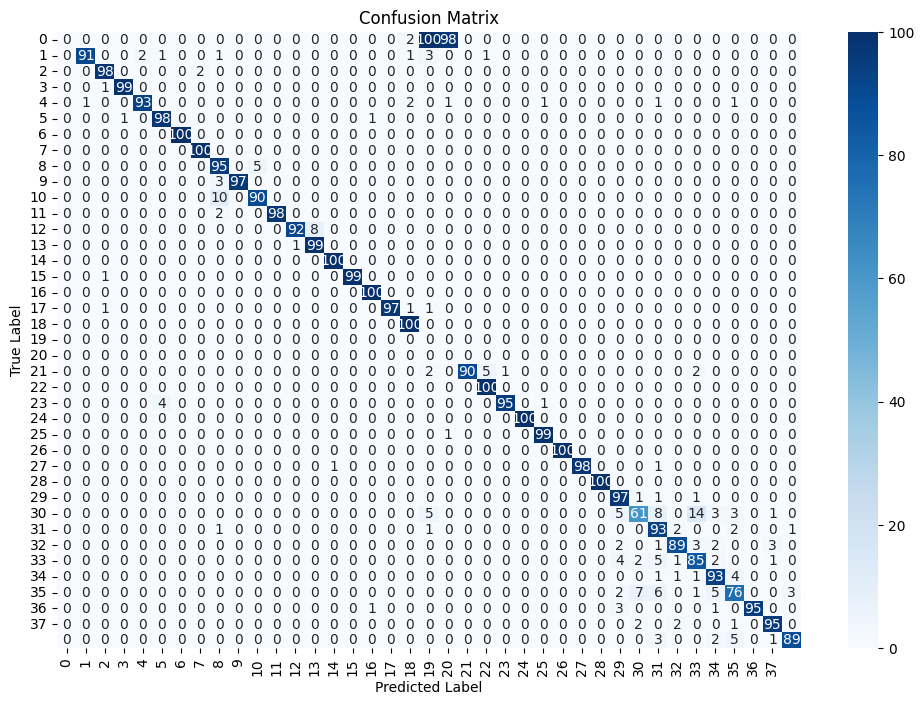

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=disease_labels.values(), yticklabels=disease_labels.values())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


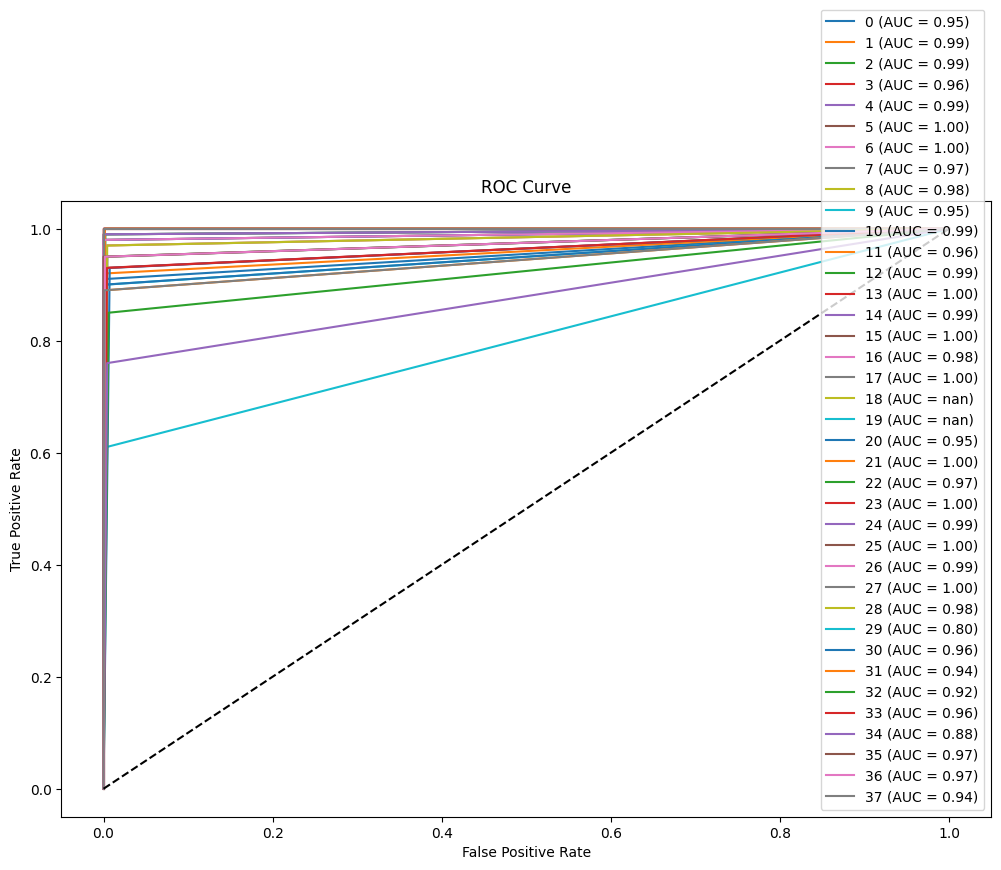

In [35]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Convert y_true and y_pred to one-hot encoding
y_true_bin = label_binarize(y_true, classes=np.arange(len(disease_labels)))
y_pred_bin = label_binarize(y_pred, classes=np.arange(len(disease_labels)))

plt.figure(figsize=(12, 8))

for i in range(len(disease_labels)):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{list(disease_labels.values())[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


# Fine Tuning Model

In [44]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the model from Kaggle
base_model = hub.load("https://www.kaggle.com/models/rishitdagli/plant-disease/TensorFlow2/plant-disease/1")

# Convert it to a Keras model
base_model = tf.keras.Sequential([hub.KerasLayer(base_model, trainable=False)])  # Set trainable=True for fine-tuning


ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7849d0bd4e90> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)